In [1]:
import cv2
import numpy as np

In [2]:
img = cv2.imread("test_images/solidWhiteCurve.jpg")
img_gray = cv2.imread("test_images/solidWhiteCurve.jpg", 0)

In [3]:
img.shape

(540, 960, 3)

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

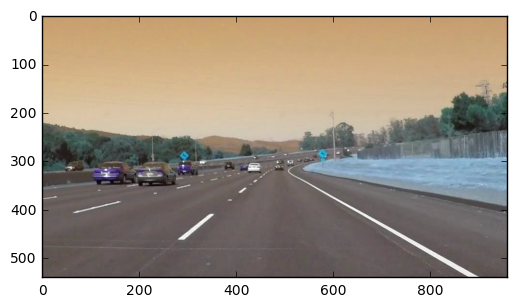

In [5]:
plt.imshow(img)

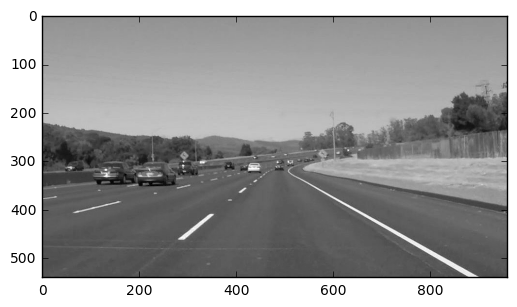

In [6]:
plt.imshow(img_gray, cmap='gray')

In [43]:
# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(img_gray, (kernel_size, kernel_size), 0)

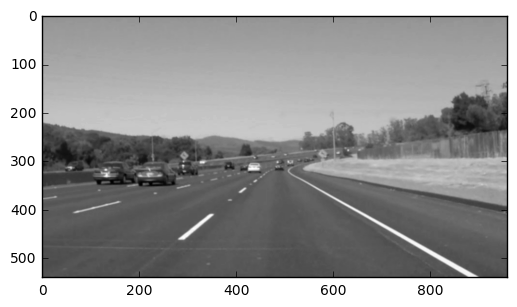

In [44]:
plt.imshow(blur_gray, cmap='gray')

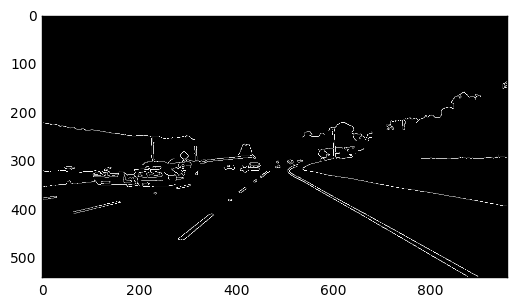

In [45]:

plt.imshow(edges, cmap='gray')

In [46]:
vertices = np.array([[[190, 540], [480, 300], [900, 540]]], dtype=np.int32)
ignore_mask_color = 255

mask = np.zeros_like(edges)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

In [47]:
rho = 1
theta = np.pi/180
threshold = 10
min_line_len = 8
max_line_gap = 10
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]), min_line_len, max_line_gap)

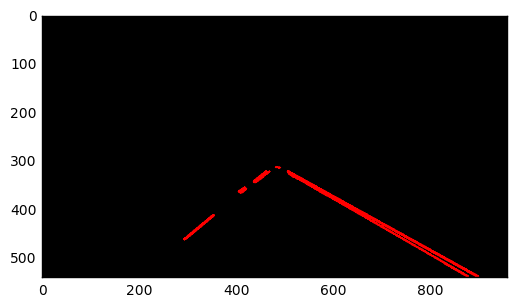

In [48]:
line_image = np.zeros_like(img)

# Draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 3)

# Show result
plt.imshow(line_image)

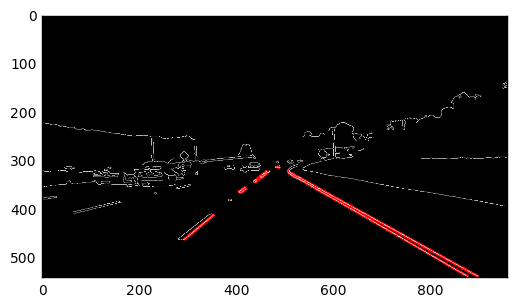

In [49]:
# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

# Draw the lines on the edge image
combo = cv2.addWeighted(color_edges, 0., line_image, 1, 0) 
plt.imshow(combo)